In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ctrace.simulation import PartitionSIR, InfectionEnv
from IPython.display import HTML

In [24]:



G = nx.grid_2d_graph(25, 25)
mapper = {n : i for i, n in enumerate(G.nodes())}
pos = {i:(y,-x) for i, (x,y) in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapper)

env = InfectionEnv(G, transmission_rate = 0.5, delay=15, clusters=8)



In [25]:
hist = env.SIR_History

In [26]:
def grid_sir(G, SIR, ax):
    
    SIR = PartitionSIR.from_list(SIR)
    # Susceptible
    
    susceptible_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=list(SIR.S), node_color="black", node_size=30, ax=ax) # Node
    susceptible_nodes.set_edgecolor("black") # Node Border

    # Infected
    infected_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=list(SIR.I), node_size=90, node_color="red", ax=ax) # Node
    infected_nodes.set_edgecolor("black") # Node Border

    # Recovered
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="black")
    recovered_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=list(SIR.R), node_size=90, node_color="silver",  ax=ax)
    recovered_nodes.set_edgecolor("black")

    # nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)

    # TODO: Draw v1-v2 edges
    edgelist = []
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=[], ax=ax)

<IPython.core.display.Javascript object>


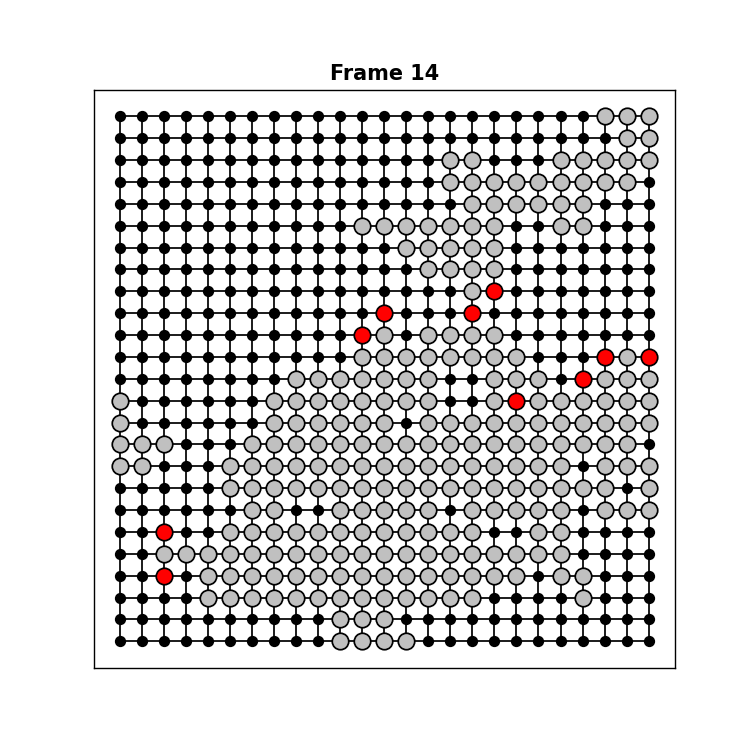

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
def update(num):
    ax.clear()

    grid_sir(G, hist[num], ax)
    
    # Scale plot ax
    ax.set_title(f"Frame {num}", fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(hist), interval=500, repeat=True, repeat_delay=1)
plt.show()
HTML(ani.to_html5_video())

In [29]:
p = .7
np.count_nonzero(np.random.choice(2, 1000, p=[p, 1-p]))

292

In [23]:
x = np.arange(9)
np.split(x, 3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]